In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import io
import seaborn as sns

In [ ]:
from google.colab import files
upload=files.upload()

Saving train.csv to train.csv


In [ ]:
df=pd.read_csv('train.csv')
df.shape
df.isnull().sum()

id                0
IsHoliday         0
Weekly_Sales      0
Total_MarkDown    0
Month             0
Fuel_Price        0
Store             0
Week              0
Size              0
mean              0
Temperature       0
min               0
CPI               0
Unemployment      0
Dept              0
median            0
max               0
Year              0
Date              0
Type              0
std               0
dtype: int64

In [ ]:
df.describe()

,id,IsHoliday,Weekly_Sales,Total_MarkDown,Month,Fuel_Price,Store,Week,Size,mean,Temperature,min,CPI,Unemployment,Dept,median,max,Year,std
count,261972.000000,261972.000000,261972.000000,261972.000000,261972.00000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000,261972.000000
mean,130986.500000,0.061194,13051.968654,4791.010940,6.44441,3.355035,22.301609,25.816343,134557.132300,13342.314464,60.287160,8425.871548,173.404159,7.695389,43.417896,12558.658934,30515.377370,2019.969077,3592.989482
std,75624.946698,0.239685,15426.224679,8780.486617,3.17725,0.466737,12.922399,13.823619,60822.379892,15481.729839,18.108727,11372.325497,38.926893,1.390372,30.066486,15041.774310,42045.685428,0.802713,5246.522943
min,1.000000,0.000000,0.000000,0.000000,1.00000,2.472000,1.000000,1.000000,34875.000000,-116.454545,14.020000,-4988.940000,126.064000,3.879000,1.000000,-143.000000,0.020000,2019.000000,0.000000
25%,65493.750000,0.000000,1969.517500,0.000000,4.00000,2.895000,11.000000,14.000000,93188.000000,2291.057063,47.170000,668.930000,132.756800,6.858000,18.000000,1987.000000,5776.260000,2019.000000,731.346429
50%,130986.500000,0.000000,7077.865000,0.000000,6.00000,3.467000,22.000000,26.000000,128107.000000,7516.448182,62.590000,3844.220000,188.654469,7.838000,36.000000,6847.290000,17227.370000,2020.000000,1879.452329
75%,196479.250000,0.000000,18239.412500,6893.330000,9.00000,3.738000,33.000000,37.000000,202307.000000,18687.708250,74.240000,11424.500000,213.190421,8.512000,72.000000,17291.980000,41082.450000,2021.000000,4264.078123
max,261972.000000,1.000000,72752.410000,43413.900000,12.00000,4.468000,45.000000,52.000000,219622.000000,108598.364100,100.140000,72028.740000,227.232807,12.187000,99.000000,107690.800000,649770.180000,2021.000000,71265.927070


In [ ]:
df.head()

,id,IsHoliday,Weekly_Sales,Total_MarkDown,Month,Fuel_Price,Store,Week,Size,mean,...,min,CPI,Unemployment,Dept,median,max,Year,Date,Type,std
0,1,0,13381.89,12842.28,6,3.746,26,23,152513,13208.499230,...,6120.86,138.117419,7.489,23,12926.41,37432.64,2021,08-06-2021,A,4158.467030
1,2,0,3557.00,0.00,5,3.145,10,19,126512,4361.426503,...,2712.29,126.208548,9.524,27,3837.00,13078.92,2019,14-05-2019,B,1558.230214
2,3,0,114.40,0.00,4,3.524,3,13,37392,138.125874,...,44.00,218.211418,7.574,60,132.00,299.20,2020,01-04-2020,B,44.311329
3,4,0,52.65,0.00,9,2.582,30,37,42988,77.297376,...,0.95,211.180642,8.099,85,70.60,320.64,2019,17-09-2019,C,54.640116
4,5,0,3043.38,0.00,3,2.654,34,9,158114,3032.286713,...,1655.84,126.578286,9.521,24,2592.51,7661.74,2019,05-03-2019,A,1300.513723


In [ ]:
df.isnull().sum()

id                0
IsHoliday         0
Weekly_Sales      0
Total_MarkDown    0
Month             0
Fuel_Price        0
Store             0
Week              0
Size              0
mean              0
Temperature       0
min               0
CPI               0
Unemployment      0
Dept              0
median            0
max               0
Year              0
Date              0
Type              0
std               0
dtype: int64

from data it is concluded that no missing values are present and type and date columns are the only categorical columns(we need to encode them)

In [ ]:
df['Type'].value_counts()

A    131635
B    104382
C     25955
Name: Type, dtype: int64

In [ ]:
df['Date'].value_counts()

12-10-2021    2049
21-09-2021    2045
27-04-2021    2035
20-04-2021    2026
13-04-2021    2026
              ... 
06-01-2021    1288
03-08-2021    1216
30-12-2020     858
25-11-2020     615
03-02-2021     453
Name: Date, Length: 143, dtype: int64

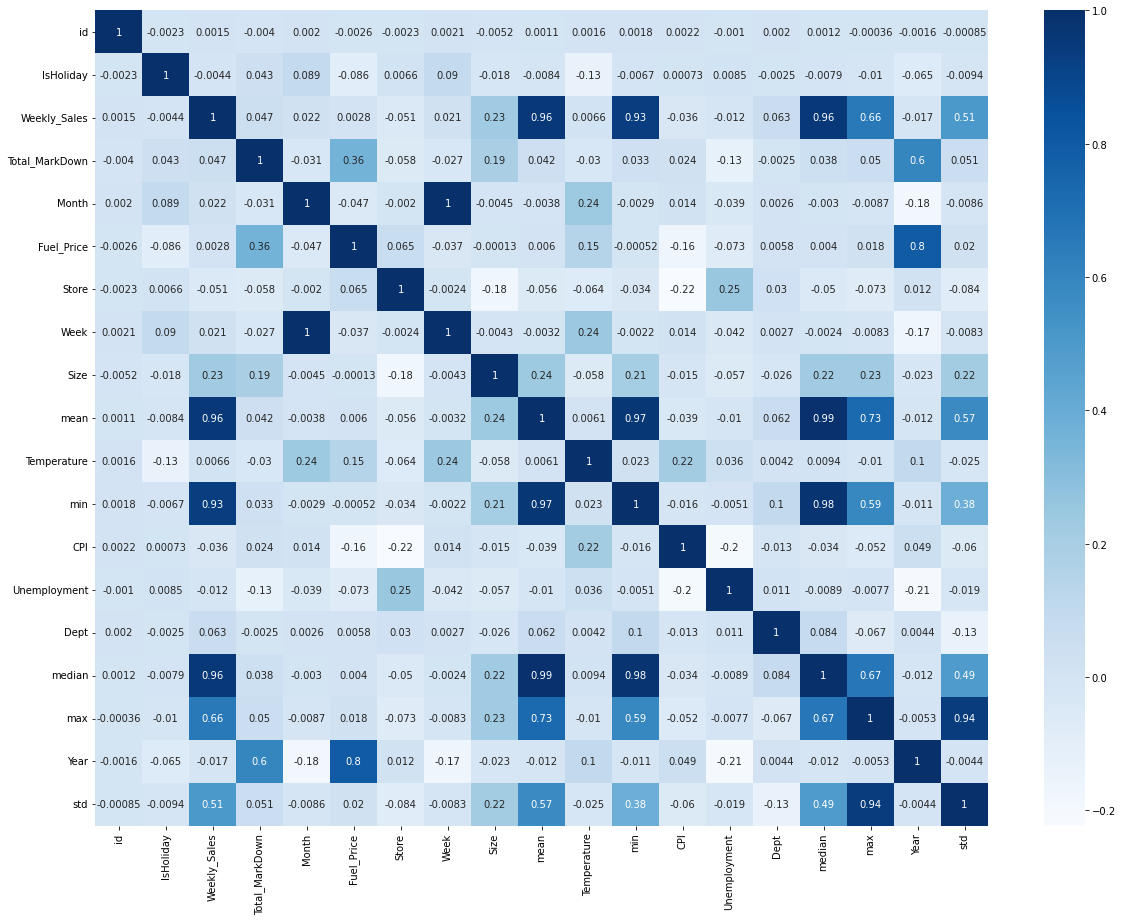

In [ ]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

Removing rows where date is less than nov 2020 and holiday season but no markdown discounts

In [ ]:
df2=df.loc[(df['Month']<11)&(df['Year']<=2020)&(df['Total_MarkDown']==0)&(df['IsHoliday']==1)]
df3=df2.loc[(df2['IsHoliday']==1)&(df2['Total_MarkDown']==0.0)].index
df.drop(df3,inplace=True)
df.shape

(254616, 21)

In [ ]:
# from sklearn import preprocessing
# #label encoding attributes-type
# le=preprocessing.LabelEncoder()
# #encoding sex attribute
# le.fit(df['Type'])
# le.classes_
# df['Type']=le.transform(df['Type'])

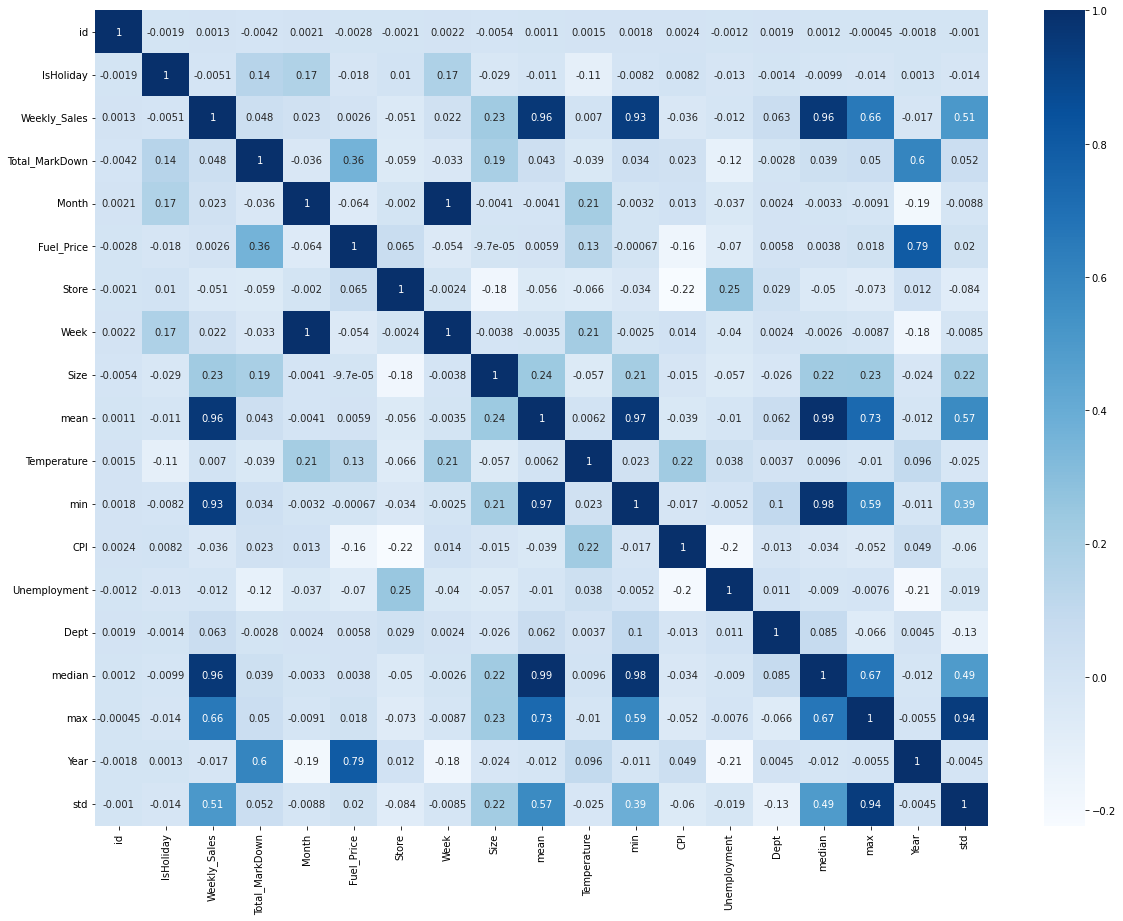

In [ ]:
df['Type'].value_counts()
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'IsHoliday'}>,
        <AxesSubplot:title={'center':'Weekly_Sales'}>,
        <AxesSubplot:title={'center':'Total_MarkDown'}>],
       [<AxesSubplot:title={'center':'Month'}>,
        <AxesSubplot:title={'center':'Fuel_Price'}>,
        <AxesSubplot:title={'center':'Store'}>,
        <AxesSubplot:title={'center':'Week'}>],
       [<AxesSubplot:title={'center':'Size'}>,
        <AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'Temperature'}>,
        <AxesSubplot:title={'center':'min'}>],
       [<AxesSubplot:title={'center':'CPI'}>,
        <AxesSubplot:title={'center':'Unemployment'}>,
        <AxesSubplot:title={'center':'Dept'}>,
        <AxesSubplot:title={'center':'median'}>],
       [<AxesSubplot:title={'center':'max'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'std'}>, <AxesSubplot:>]],
      dtype=object)

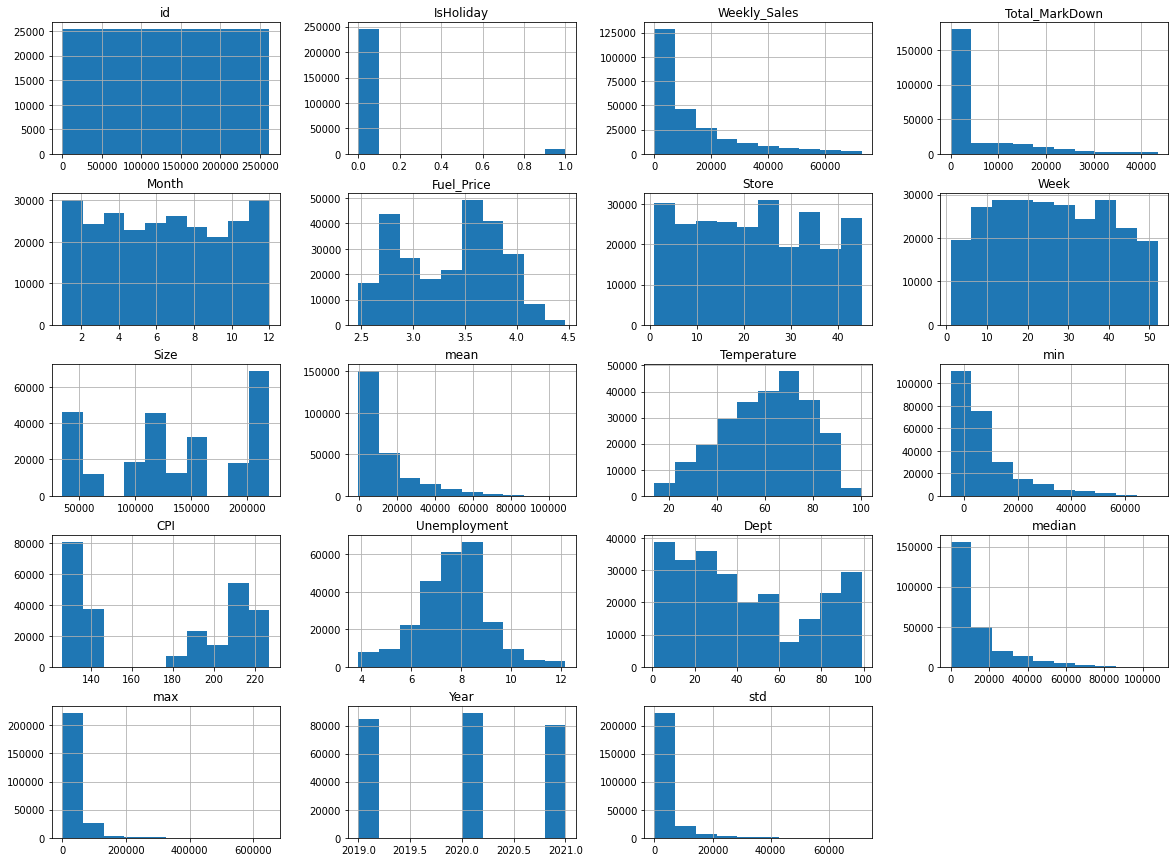

In [ ]:
df.hist(figsize=(20,15))

In [ ]:
# df['Total_MarkDown']=np.log(df['Total_MarkDown']+1)
# df['mean']=np.log(df['mean']+1)
# df['median']=np.log(df['median']+1)
# df['min']=np.log(df['min']+1)
# df['max']=np.log(df['max']+1)
# df['std']=np.log(df['std']+1)
# df.hist(figsize=(20,20))

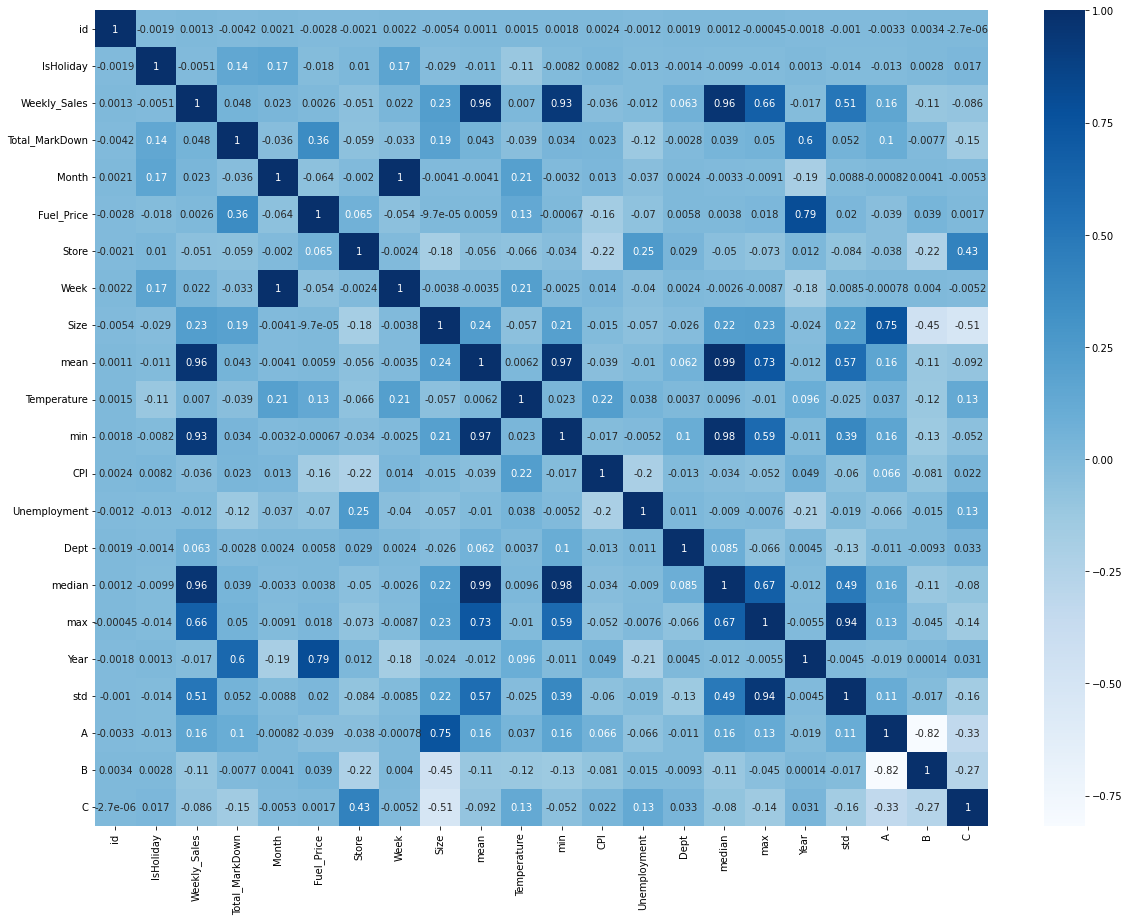

In [ ]:
df=df.join(pd.get_dummies(df.Type)).drop(['Type'],axis=1)
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()


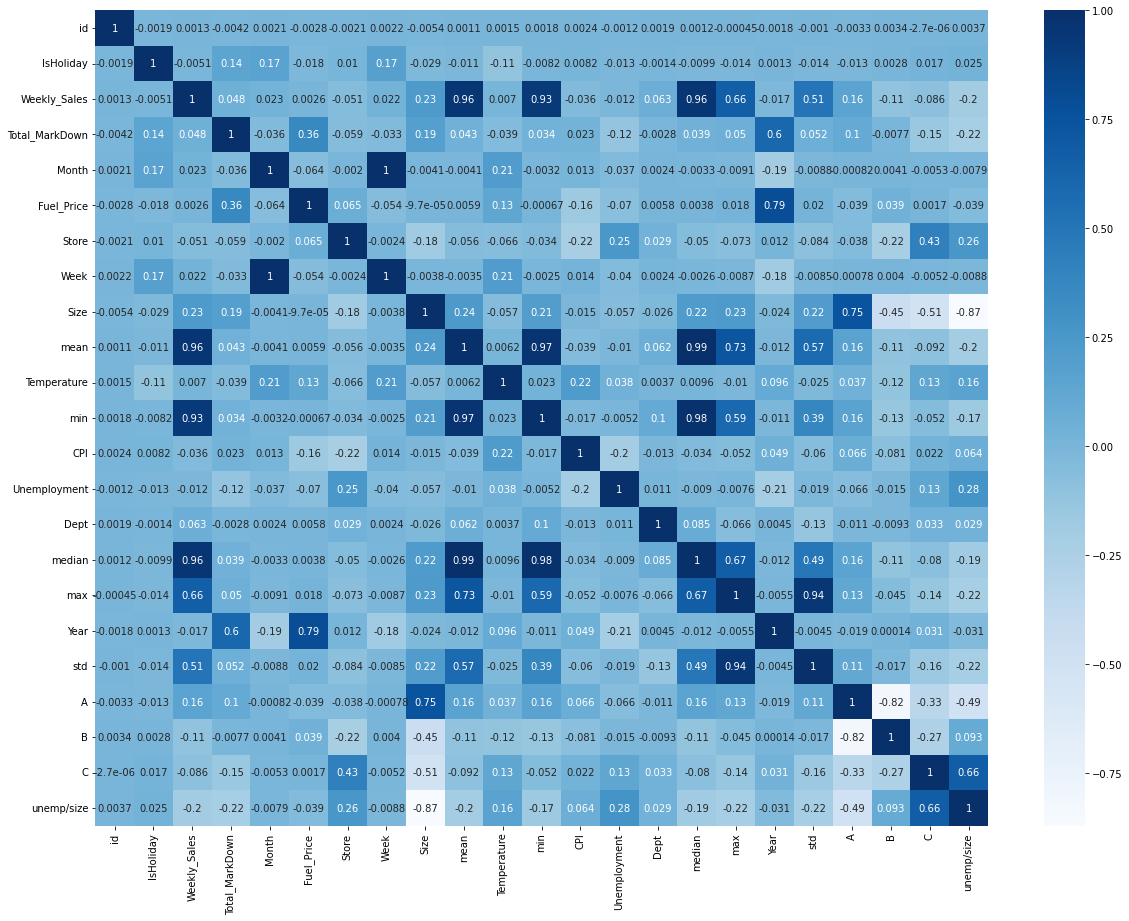

In [ ]:
df['unemp/size']=df['Unemployment']/df['Size']
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),cmap="Blues",annot=True)
plt.show()

In [ ]:
df.shape

(254616, 24)

In [ ]:
from google.colab import files
upload=files.upload()

Saving test.csv to test.csv


In [ ]:
df_test=pd.read_csv('test.csv')
df_test.shape
df_test=df_test.join(pd.get_dummies(df_test.Type)).drop(['Type'],axis=1)
df_test['unemp/size']=df_test['Unemployment']/df_test['Size']
df_test.shape

(112275, 23)

In [ ]:
# df2_test=df_test.loc[(df_test['Month']<11)&(df_test['Year']<=2020)&(df_test['Total_MarkDown']==0)&(df_test['IsHoliday']==1)]
# df3_test=df2_test.loc[(df2_test['IsHoliday']==1)&(df2_test['Total_MarkDown']==0.0)].index
# df_test.drop(df3_test,inplace=True)
# df_test.shape

In [ ]:
df_test[['mean','min','median','max','Size','A','B','unemp/size']].isnull().sum()
df_test.shape

(112275, 23)

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# from sklearn import linear_model
# train_x = np.asanyarray(df[['mean','min','median','max','Size','A','B','unemp/size']])
# train_y = np.asanyarray(df['Weekly_Sales'])

# test_arr = np.asanyarray(df_test[['mean','min','median','max','Size','A','B','unemp/size']])
# poly = PolynomialFeatures(degree=7)
# train_x_poly = poly.fit_transform(train_x)
# train_x_poly

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 8, random_state = 18)
train_x = np.asanyarray(df[['mean','min','median','max','Size','A','B','unemp/size']])
train_y = np.asanyarray(df['Weekly_Sales'])
test_arr = np.asanyarray(df_test[['mean','min','median','max','Size','A','B','unemp/size']])
rf.fit(train_x, train_y)
prediction = rf.predict(test_arr)

In [ ]:
df_final=pd.DataFrame(df_test['id'],columns=['id'])
df_final['Weekly_Sales']=prediction
df_final

,id,Weekly_Sales
0,261973,43022.388729
1,261974,293.167593
2,261975,14854.970624
3,261976,8676.309049
4,261977,47383.404723
...,...,...
112270,374243,208.579154
112271,374244,17012.377482
112272,374245,2515.494116
112273,374246,16139.639819


In [ ]:
df_final.to_csv(r'final.csv', index = False)
files.download("final.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>